# Ismael Kipyegon
# Network Intrusion Detection Analysis

## Import Required Libraries

In this section, we import all necessary Python libraries for our network security analysis:

- **pandas**: For data manipulation and analysis
- **matplotlib.pyplot**: For creating static visualizations and plots
- **seaborn**: For enhanced statistical visualizations and better default styles

These libraries will enable us to load, clean, explore, and visualize the UNSW-NB15 network traffic dataset to identify patterns and potential cyber threats.

In [41]:
#Import the pandas library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Dataset Loading

Importing the UNSW-NB15 training dataset containing network traffic records with both normal and attack instances for intrusion detection analysis.

In [42]:
#Read the CSV file into a DataFrame
df= pd.read_csv('UNSW_NB15_training-set.csv')

## Dataset Overview

In this section, we examine the basic structure and composition of our dataset using the `df.info()` method. This provides us with:

- **DataFrame structure**: Number of rows and columns
- **Column details**: Names and data types of each feature
- **Memory usage**: How much space the dataset occupies
- **Non-null counts**: Identification of missing values in each column

This initial inspection helps us understand the dataset's scale, data types, and potential data quality issues before proceeding with deeper analysis.

In [43]:
#Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

## Data Preview

First 20 rows of the UNSW-NB15 dataset showing actual network traffic records with features like duration, protocols, packet counts, and attack labels.

In [72]:
#The display of the first few rows of the DataFrame
df.head(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,...,1,2,0,0,0,2,2,0,Normal,0
6,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,...,1,2,0,0,0,2,2,0,Normal,0
7,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,...,1,3,0,0,0,1,3,0,Normal,0
8,0.000000,arp,-,INT,1,0,46,0,0.00000,0,...,2,2,0,0,0,2,2,1,Normal,0
9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,...,2,2,0,0,0,2,2,1,Normal,0


## Descriptive Statistics

Summary statistics showing count, mean, standard deviation, min/max values, and quartiles for all numerical features in the network traffic data.

In [59]:
# The summary statistics of the DataFrame 
df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


## Data Dimensions

Overview of dataset size showing the number of records (rows) and features (columns) available for network intrusion analysis.

In [60]:
# The shape of the DataFrame
df.shape

(82332, 37)

## Dataset Features

Complete list of all column names representing network traffic attributes and security labels in the UNSW-NB15 dataset.

In [61]:
# The column names of the DataFrame
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')

## Data Cleaning: Column Removal

Removing specified columns that are either irrelevant for intrusion detection analysis or contain problematic data, streamlining the dataset for machine learning.

In [62]:
# List of columns to drop
columns_to_drop = ['id', 'tcprtt', 'synack', 'ackdat', 'sloss', 'dloss', 'trans_depth', 'response_body_len']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')

In [63]:
df.shape

(82332, 37)

# Data Cleaning

Remove missing values and duplicate records to ensure data quality for analysis.

In [64]:
df_clean = df.dropna()
df_clean = df_clean.drop_duplicates()
df_clean.shape

(55935, 37)

## Network Traffic Pattern: Duration vs Rate

Line plot showing the relationship between connection duration and data transfer rate to identify patterns in network behavior.

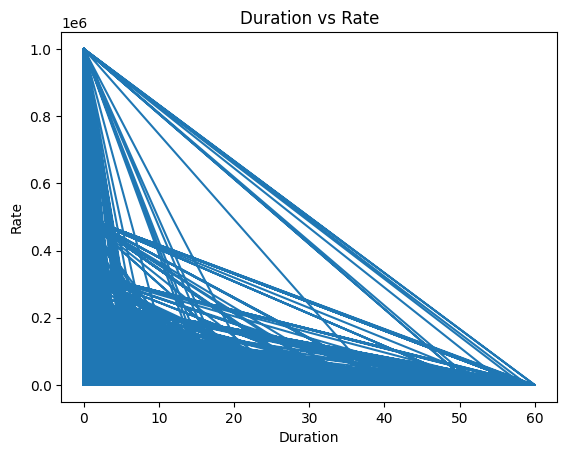

In [65]:
# Select two numeric columns
x = df['dur']
y = df['rate']

# Simple line plot
plt.plot(x, y)
plt.xlabel('Duration')
plt.ylabel('Rate')
plt.title('Duration vs Rate')
plt.show()

# Target Variable Distribution

Bar plot showing the frequency of normal (0) vs attack (1) network traffic instances.

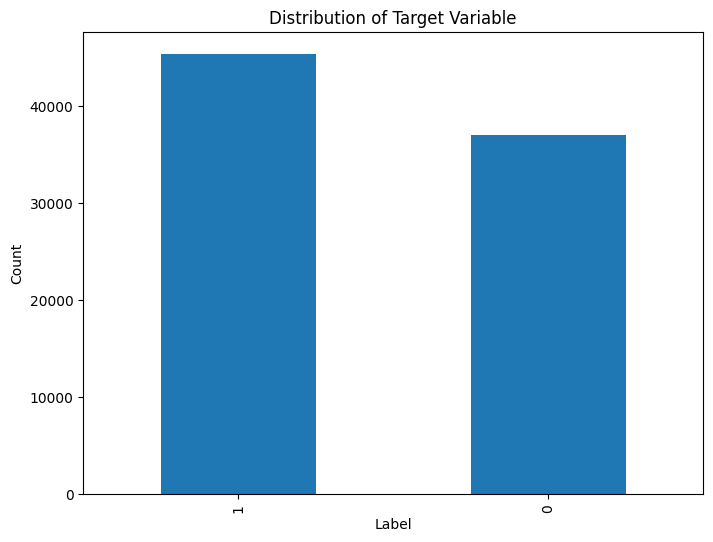

In [66]:
# Plot the distribution of the target variable
plt.figure(figsize=(8,6))
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()


## Average Traffic Rates by Attack Category

Horizontal bar plot showing the mean data transfer rate for each type of network attack, enabling quick comparison of bandwidth consumption across different attack methodologies and aiding in resource allocation for security monitoring.

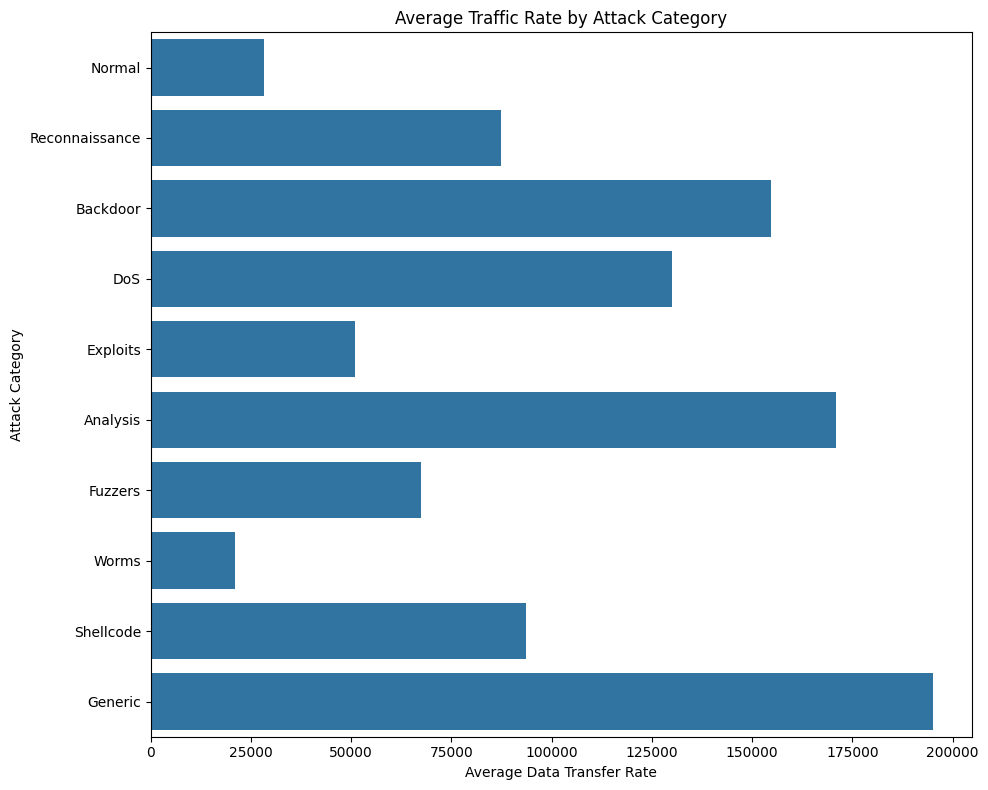

In [84]:
# Horizontal bar plot for Average Traffic Rate by Attack Category
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='rate', y='attack_cat', estimator='mean', errorbar=None)
plt.xlabel('Average Data Transfer Rate')
plt.ylabel('Attack Category')
plt.title('Average Traffic Rate by Attack Category')
plt.tight_layout()
plt.show()

## Average Source Bytes by Service Type

Horizontal bar plot comparing the mean data volume sent from sources across different network services, highlighting which services typically generate the most outgoing traffic and helping identify potential data exfiltration patterns.

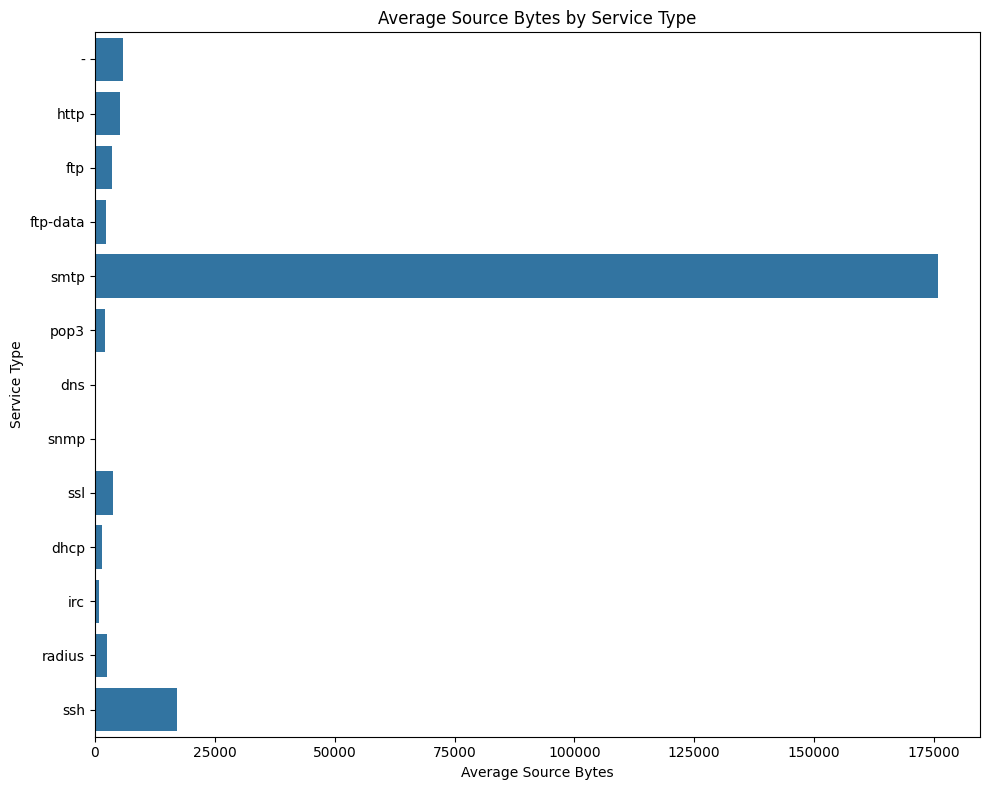

In [81]:
# 2. Horizontal bar plot for better readability
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='sbytes', y='service', estimator='mean', errorbar=None)
plt.xlabel('Average Source Bytes')
plt.ylabel('Service Type')
plt.title('Average Source Bytes by Service Type')
plt.tight_layout()
plt.show()

## Source Load Distribution by Protocol

Violin plot showing the distribution of data load rates across different network protocols, revealing typical usage patterns, variability, and potential outliers in protocol-specific traffic behavior.

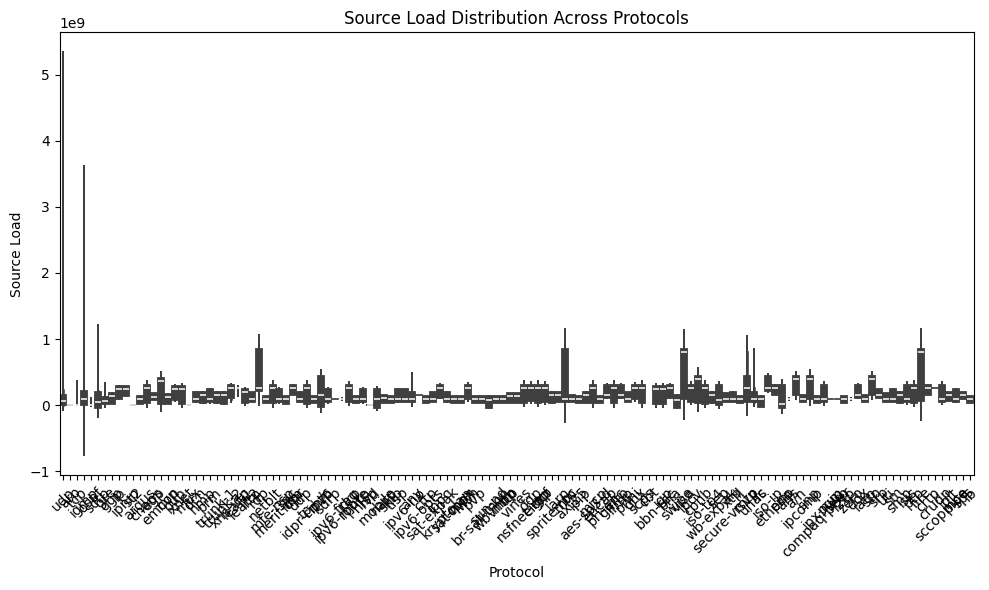

In [77]:
# 5. Distribution of Data Load by Protocol
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='proto', y='sload')
plt.xlabel('Protocol')
plt.ylabel('Source Load')
plt.title('Source Load Distribution Across Protocols')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()